In [1]:
from matplotlib import pyplot as plt
import numpy as np
import healpy

from scipy import interpolate

from synmock import model, lncat

In [2]:
font = {'family': 'serif',
        'color':  'w',
        'weight': 'bold',
        'size': 96,
}

In [3]:
M = model.ModelPk(Omega_cdm=0.25, Omega_b=0.05, h=0.69)

In [4]:
nofz = lambda z: np.logical_and(z > 0.5, z<0.6)*1e-3

In [5]:
L = lncat.LogNormCat(M, nofz=nofz, box_length=4096, cell_size=16)

In [6]:
cat = L.skycoord

logk min -9.210340371976182


In [7]:
ra,dec,z,zs = np.transpose(cat)

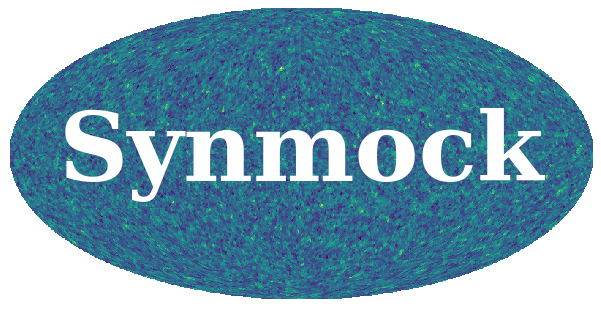

In [8]:
nside = 64
pix = healpy.ang2pix(nside, ra, dec, lonlat=True)
map = np.zeros(12*nside**2)
h = np.bincount(pix)
map[:len(h)] = h

healpy.mollview(map, rot=(180, 0), cbar=None, title=None)

plt.figtext(0.5, 0.5, "Synmock", ha='center', va='center', fontdict=font)
plt.savefig("logo.png")